# **Визуализация в `seaborn`**

**Документация**: https://seaborn.pydata.org

Шпаргалка по визуализации: https://www.data-to-viz.com/
- Какими графиками можно визуализировать ваши признаки 
- Объяснение каждого графика
- Примеры, как нарисовать такой график в `seaborn` с подробным разбором аргументов
- Даже примерно показывают как выглядят ваши признаки
- Настоятельно советую хотя бы посмотреть!

In [1]:
# если не установлена библиотека - раскомментируйте строчку ниже
# !pip install seaborn -q

Импортируем библиотеку `seaborn`:

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt     # он нам понадобится

## **1. Preliminary**

### *1.1 Зачем?*

*Зачем нам `seaborn`, если есть `matplotlib`?*

1. **Интегрирован с `pandas`**: можно работать напрямую с датафреймами
2. **Много доп графиков**: в `seaborn` есть некоторые типы графиков, например violin plots, pair plots, heatmaps, которые могут быть вам полезны, но их сложно создать с помощью `matplotlib`.
3. **Более user-frienly** по сравнению с `matplotlib`. Из-за этого уровень кастомизации падает. Но эту проблему можно решить "дописыванием" этих фичей через matplotlib (н-р использование `subplots()`)

Из минусов библиотеки можно назвать трудности с отрисовкой очень больших объемов данных - `matplotlib` и `.plot()` чаще справляется гораздо быстрее

### *1.2 Настройки по умолчанию*

<div style="background-color: rgba(128, 0, 128, 0.1); padding: 16px; border-radius: 8px; text-align: left;">

Настройка оформления графиков в `seaborn` позволяет задать **единый** стиль, цвета, размеры и другие параметры для всех графиков в блокноте.

Это удобно, так как избавляет от необходимости указывать аргументы для каждого графика вручную. Достаточно настроить параметры один раз в начале блокнота. 

</div>

**Основные настройки оформления по умолчанию**

*Полный список* возможностей и аргументов можно найти в [документации Seaborn](https://seaborn.pydata.org/api.html#theme-functions).

1. **Стили графиков (`sns.set_style()`)**  - устанавливает общий стиль графиков: фон, сетку, отметки осей. Ознакомится со стилями - по [ссылке](https://seaborn.pydata.org/tutorial/aesthetics.html).

2. **Цветовые палитры (`sns.set_palette()`)** - задает палитру  цветов для всех графиков (посмотреть на них по [ссылке](https://seaborn.pydata.org/tutorial/color_palettes.html)). 

3. **Размер и разрешение графиков (`sns.set()`)** - настраивает размер и качество графиков по умолчанию через параметр `rc`.  
   - `figure.figsize` - размер графика (ширина, высота) в дюймах.  
   - `figure.dpi` - разрешение графика (четкость)

Поставим так, но с этим можно поиграться:

In [5]:
sns.set_style('darkgrid')   # темный фон
sns.set_palette('dark')     # темная палетка цветов для графиков
sns.set(rc = {"figure.figsize": (8, 6), "figure.dpi" : 120})

### *1.3 Типы графиков*

Синтаксис для построения различных графиков в `seaborn` следующий:

| Тип графика | Синтаксис `seaborn` | Описание |
|-------------|---------------------|----------|
| **Линейный график** | `sns.lineplot(data=df, x='col_x', y='col_y')` | зависимость между двумя числовыми переменными, соединяя точки линиями|
| **Столбчатая диаграмма (по количеству)** | `sns.countplot(data=df, x='col')` | количество наблюдений для каждой категории |
| **Столбчатая диаграмма** | `sns.barplot(data=df, x='col_cat', y='col_values')` | агрегированные значения (например, среднее) для категорий |
| **Гистограмма** | `sns.histplot(data=df, x='col')` | распределение числовой переменной |
| **Ящик с усами** | `sns.boxplot(data=df, x='col_cat', y='col_values')` | распределение числовой переменной |
| **Скрипичная диаграмма** | `sns.violinplot(data=df, x='col_cat', y='col_values')` | ящик с усами + плотность распределения |
| **График рассеяния** | `sns.scatterplot(data=df, x='col_x', y='col_y')` | взаимосвязь между двумя числовыми переменными |
| **График Всего** | `sns.pairplot(df)` | много графиков рассеяния для всех пар числовых столбцов |
| **Тепловая карта** | `sns.heatmap(df.corr())` | визуализирует матрицу чисел (полезно для матрицы корреляций) |

---

## **2. Основные графики**

Воспользуемся seaborn на полную и возьмем датасет, который он любезно предоставляет!

In [6]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### *2.1 Гистограмма*

**Синтаксис**

```python
    sns.histplot(x='Признак', data=table_name, ...)
```
```

[Документация](https://seaborn.pydata.org/generated/seaborn.histplot.html) - посмотреть все аргументы и возможные значения

| Аргумент         | Что делает                                                                 |
|-------------------|---------------------------------------------------------------------------|
| `data`           | Данные для построения гистограммы (`pd.DataFrame`). **Обязательный** параметр. |
| `x`              | Название столбца для оси X (**числовой** признак для гистограммы) |
| `bins`           | Количество интервалов |
| `binwidth`       | Ширина интервалов |
| `color`          | Цвет гистограммы |
| `alpha`          | Прозрачность столбцов (**float**, от 0 до 1) |
| `edgecolor`      | Цвет обводки столбцов |
| `linewidth`      | Толщина обводки столбцов |
| `stat`           | Тип статистики для отображения по OY (например, `'count'`, `'density'`, `'probability'`) |
| `kde`            | Если `True`, добавляет кривую плотности (KDE) поверх гистограммы |

Построим распределение длины клюва:

<Axes: xlabel='bill_length_mm', ylabel='Count'>

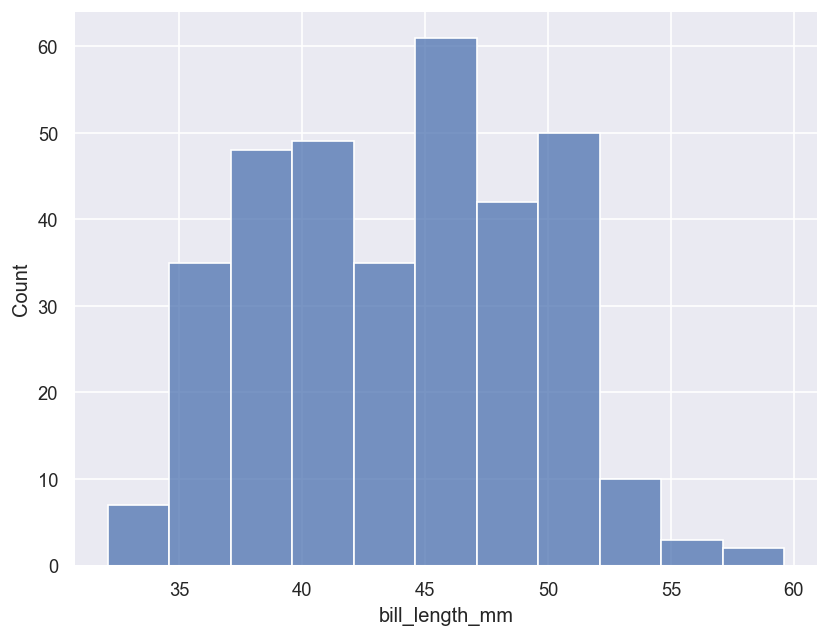

In [68]:
sns.histplot(x='bill_length_mm', data=penguins)

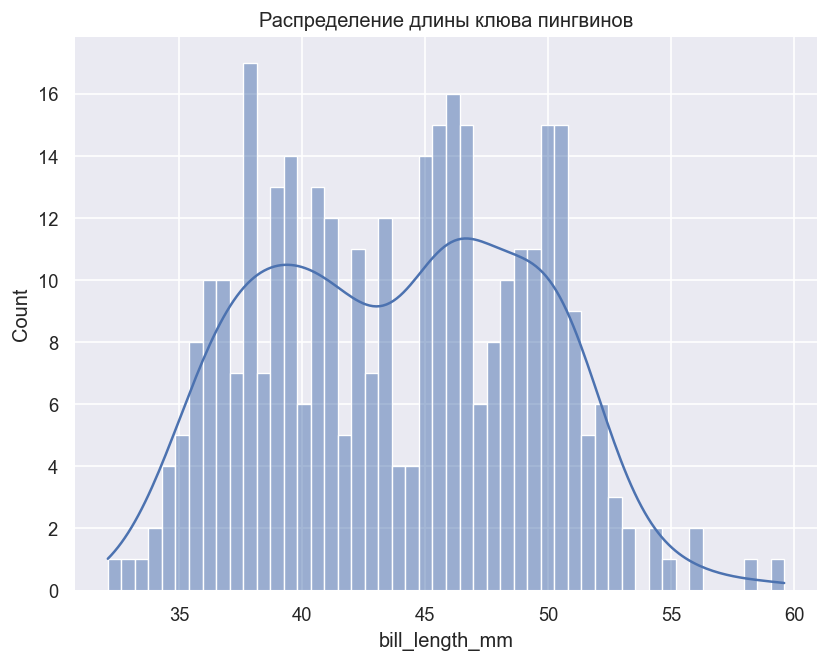

In [69]:
sns.histplot(
    x='bill_length_mm',
    data=penguins, 
    bins=50,        # увеличим число интервалов
    kde=True,       # добавим плотность
)

plt.title('Распределение длины клюва пингвинов')
plt.show()

#### Параметр **`hue`**
Библиотека `seaborn` позволяет легко строить графики, **разделенные на категории**, без необходимости фильтрации данных вручную.

Например, если вы хотите построить гистограмму для числового признака (скажем, индекса массы тела BMI) отдельно для мужчин и женщин, в `matplotlib` пришлось бы фильтровать данные по каждой категории (мужчины и женщины) и строить отдельные гистограммы для каждой группы.

В `seaborn` же достаточно указать столбец, по которому нужно разделить данные, с помощью параметра **`hue`**. Этот параметр автоматически разделяет данные на категории и отображает их разными цветами на одном графике, упрощая сравнение.

| Аргумент         | Что делает                                                                 |
|-------------------|---------------------------------------------------------------------------|
| `hue`            | Название столбца в данных, определяющего категории для цветового разделения |
| `palette`        | Цветовая палитра для категорий, заданных в `hue`. Может быть названием палитры (`'viridis'`, `'Set2'`) или списком цветов (например, `['red', 'blue']`) |
| `hue_order`      | Список, задающий порядок категорий для `hue`. Например, `hue_order=['Male', 'Female']` задает порядок отображения категорий. |
| `legend`         | Если `True` (по умолчанию), отображает легенду для категорий, заданных в `hue`. Можно отключить с помощью `legend=False`. |

Попробуем построить гистограммы отдельно для пингвинов-мальчиков и пингвинов-девочек (разделить по столбцу `sex`):

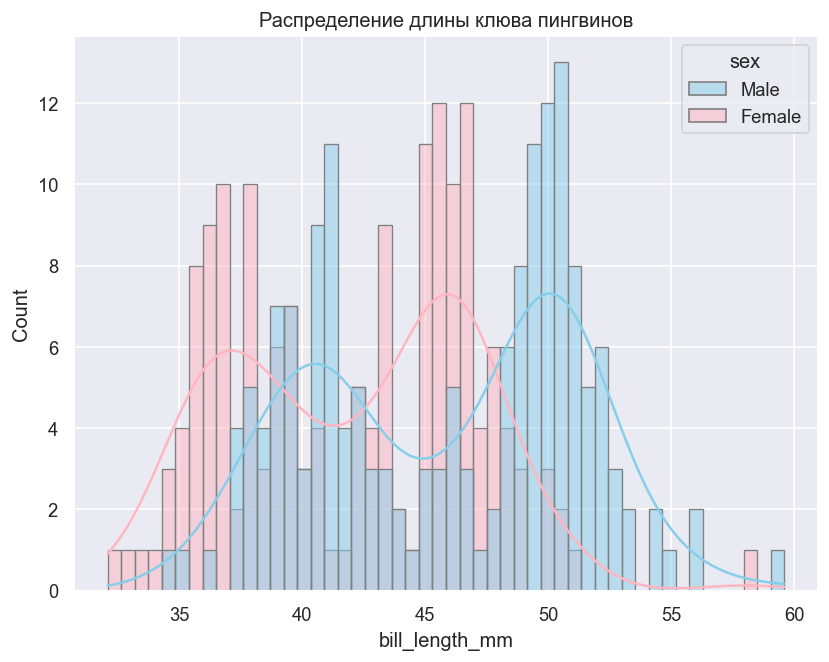

In [72]:
sns.histplot(
    x='bill_length_mm', data=penguins, 
    bins=50,
    kde=True,
    hue='sex',                          # указываем столбец разделения по категориям
    palette=['skyblue', 'lightpink'],   # задаем цвета для каждой из категорий
    edgecolor='grey'                    # обводка столбцов
)

plt.title('Распределение длины клюва пингвинов')
plt.show()

---

### *2.2 Ящик-с-усами*

**Синтаксис**

```python
    sns.boxplot(x='Признак', data=table_name, ...)
```

```

[Документация](https://seaborn.pydata.org/generated/seaborn.boxplot.html) - посмотреть все аргументы и возможные значения

| Аргумент     | Что делает |
| ------------ | -----  |
| `data`       | Данные для построения boxplot (`pd.DataFrame`). **Обязательный** параметр |
| `x`          | Название столбца для оси X (числовой признак, для которого строим распределение). **Обязательный** параметр |
| `y`          | Название столбца для оси Y (категориальный признак) |
| `color`      | Цвет ящика |
| `palette`    | Палитра цветов для разных категорий (если указаны несколько категорий) |
| `width`      | Ширина ящика |
| `fliersize`  | Размер точек-выбросов |
| `linewidth`  | Толщина линий ящика и усов  |
| `showfliers` | Показывать ли выбросы (`True/False`) |
| `notch`      | Показывать ли линию медианы (`True/False`) |


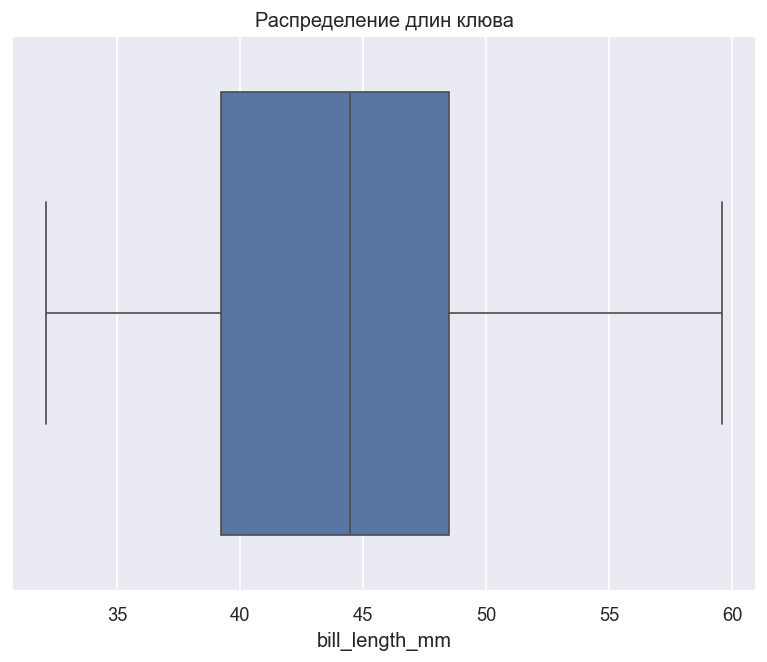

In [92]:
sns.boxplot(x='bill_length_mm', data=penguins)
plt.title('Распределение длин клюва');

Сделаем чуть покрасивше - чтобы был не таким широким:

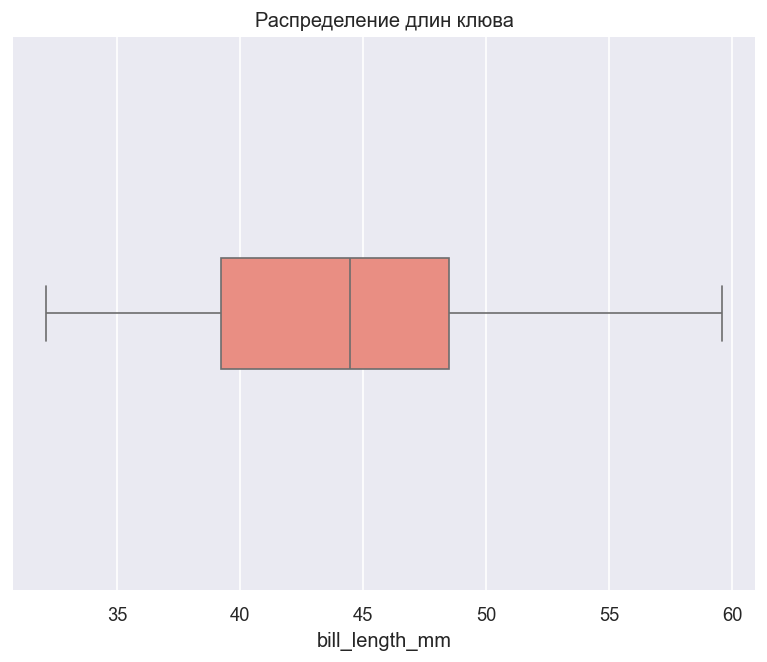

In [74]:
sns.boxplot(
    x='bill_length_mm',
    data=penguins,
    width=0.2,          # ширина ящика
    color='salmon',     # цвет ящика
)
plt.title('Распределение длин клюва');

Можно сделать отдельно ящики по категориям. Для этого в оси OY (`y`) проставливаем категориальный признак, в котором для каждой категории хотим построить свой ящик:

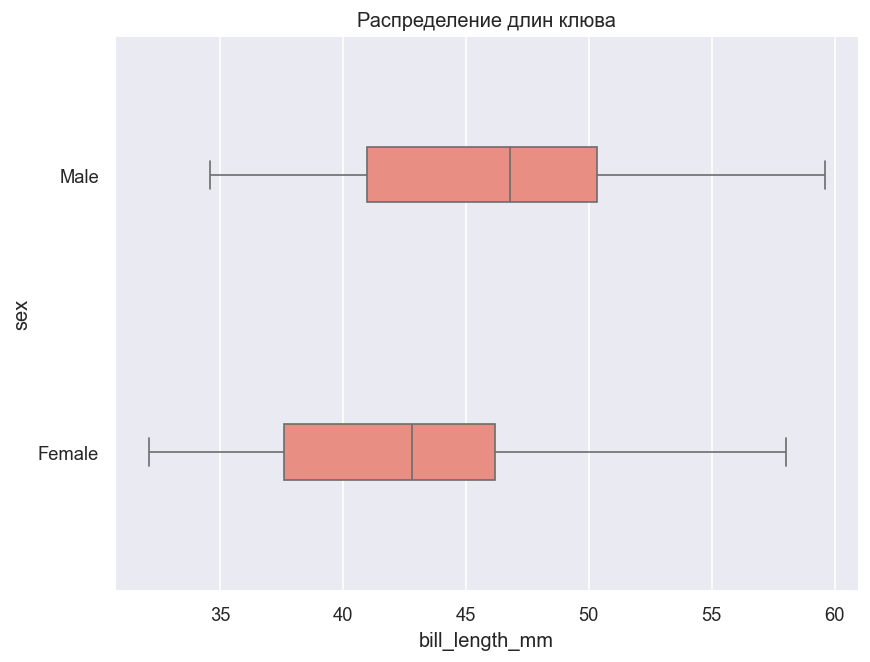

In [93]:
sns.boxplot(
    x='bill_length_mm',
    y='sex',            # строим ящики отдельно для каждого пола
    data=penguins,
    width=0.2,          # ширина ящика
    color='salmon',     # цвет ящика
)
plt.title('Распределение длин клюва');

Можно сделать примерно то же самое - но через знакомый параметр `hue`. Тогда передавать в `y` этот же признак не обязательно. Категории будут отображаться в легенде, а не по OY:

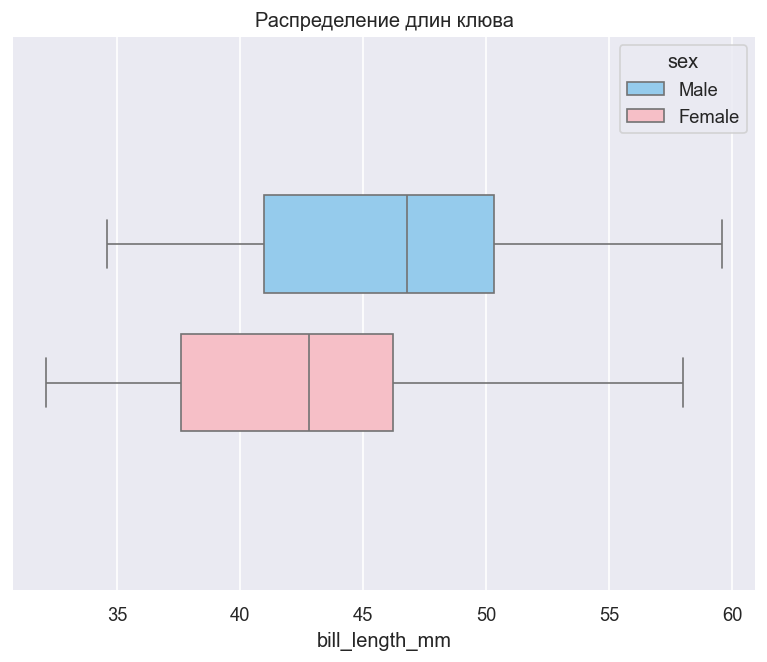

In [94]:
sns.boxplot(
    x='bill_length_mm',
    data=penguins,
    width=0.5,
    hue='sex',      # боксы отдельно для каждого пола
    palette=['lightskyblue', 'lightpink'],  # цвет каждого бокса
    gap=0.3
)

plt.title('Распределение длин клюва');

---

### *2.3 Столбчатая диаграмма*

Можно построить **частотную** столбчатую диаграмму без вызова `.value_counts()`!

**Синтаксис**

```python
    sns.countplot(x='Признак', data=table_name, ...)
```
```

[Документация](https://seaborn.pydata.org/generated/seaborn.countplot.html) - посмотреть все аргументы и возможные значения

| Аргумент     | Что делает |
| ---- | ---- | 
| `data`       | Данные для построения countplot (`pd.DataFrame`). **Обязательный** параметр. |
| `x`          | Название столбца для оси X (категориальный признак) |
| `orient`     | Ориентация графика: `'v'` — вертикально, `'h'` — горизонтально |
| `color`      | Цвет столбцов |
| `width`      | Ширина столбцов | 

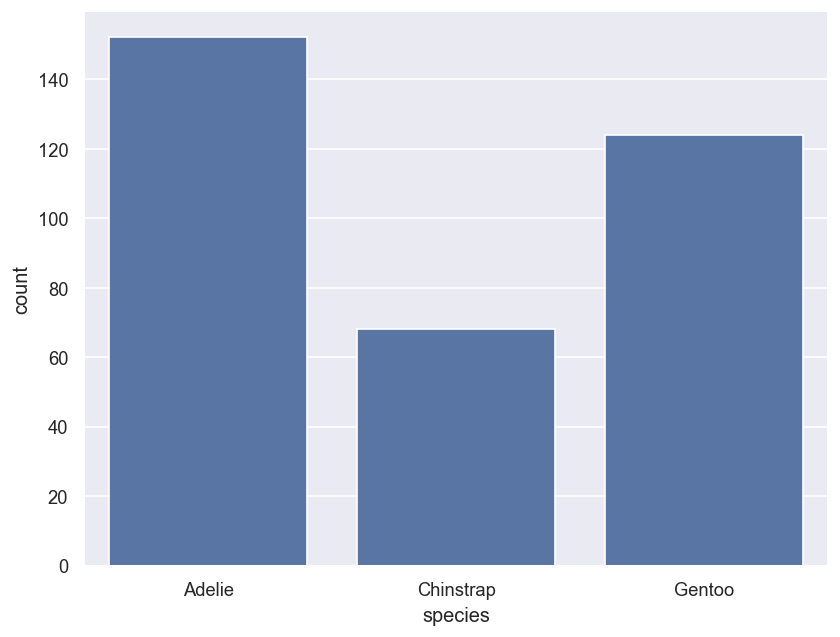

In [95]:
sns.countplot(data=penguins, x='species');

Можно также добавить разбиение по другой категории. Например нарисовать отдельно столбчатые диаграммы по полу `sex`:

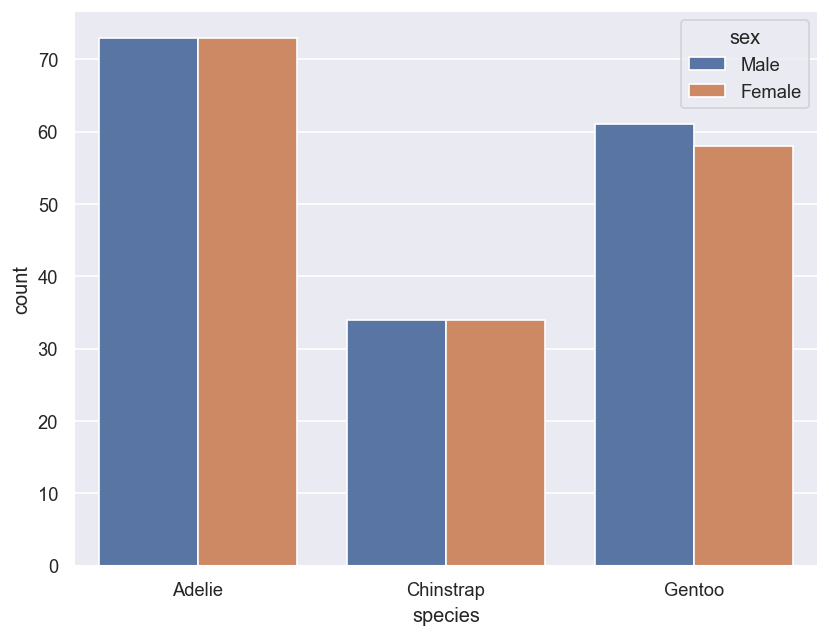

In [96]:
sns.countplot(data=penguins, x='species', hue='sex');

---

### *2.4 Диаграмма рассеяния*

**Синтаксис**

```python
    sns.scatterplot(
        x='Признак-1', y='Признак-2', data=table_name, ...
    )
```

[Документация](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) - посмотреть все аргументы и возможные значения


| Аргумент    | Что делает                                                                      |
| ----------- | ------------------------------------------------------------------------------- |
| `data`      | Данные для построения scatterplot (`pd.DataFrame`). **Обязательный** параметр.  |
| `x`         | Название столбца для оси X (числовой признак)                                   |
| `y`         | Название столбца для оси Y (числовой признак)                                   |
| `s`     | Размер точек (можно **число** или **столбец** с числовыми значениями)                   |
| `style`     | Форма точек (можно строковый признак или список форм)                           |
| `markers`   | Словарь для задания конкретных маркеров для категорий в `style`                 |
| `edgecolor` | Цвет обводки точек |
| `linewidth` | Толщина обводки точек |

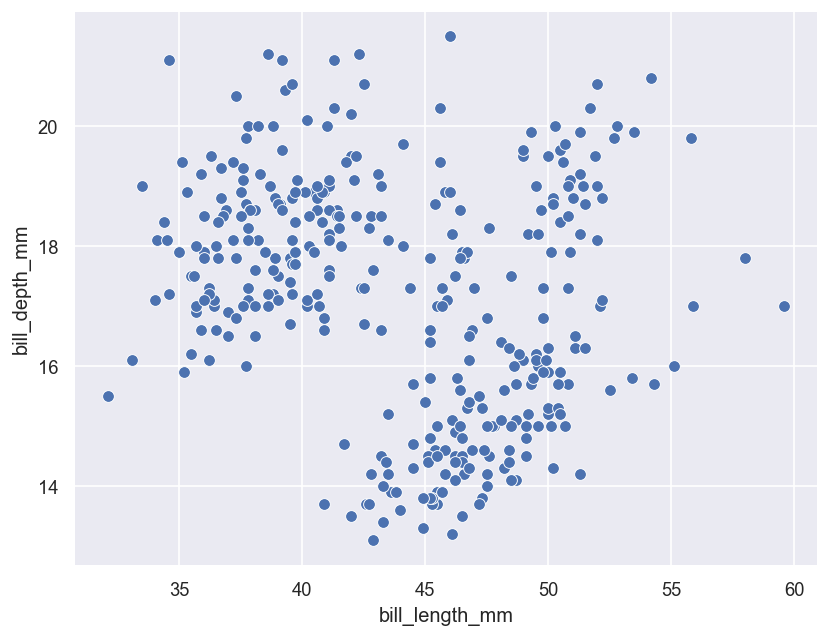

In [101]:
sns.scatterplot(
    x='bill_length_mm', y='bill_depth_mm', data=penguins,
    s=50,      # размер точек
)

plt.show()

Также можно использовать `hue`:

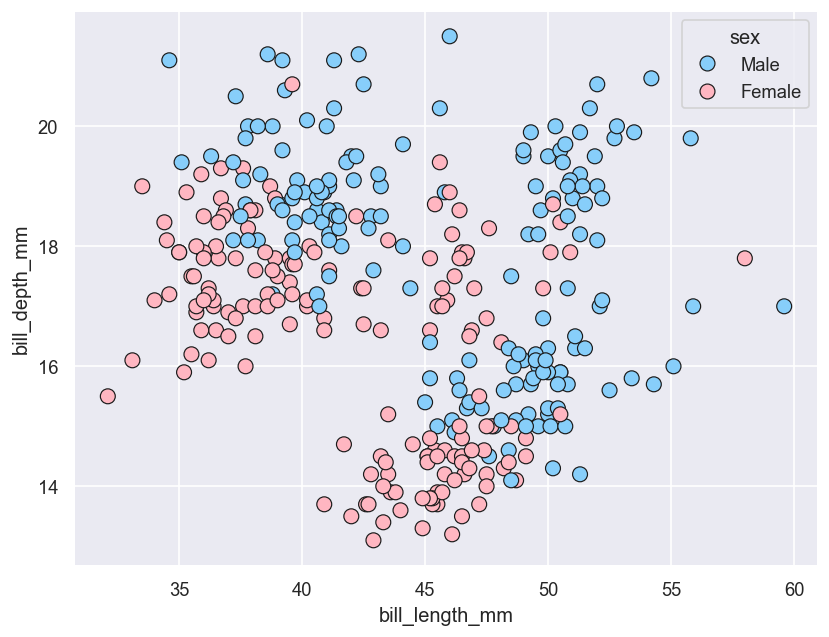

In [102]:
sns.scatterplot(
    x='bill_length_mm', y='bill_depth_mm', data=penguins,
    s=80,           # размер точек
    hue='sex',
    palette=['lightskyblue', 'lightpink'],
    edgecolor='k'   # обводка точек - черная
)

plt.show()

Помимо раскраски точек в соответствие с категориями, также можно делать **стиль точек** в соответствие с категориями:
- `hue` + `palette` - красим точки в соответствие с категорией
- `style` - для каждой категории делаем свой маркер (точка / крести etc)

Для этого в аргумент `style` передаем название столбца, по которому хотим сделать разные маркеры (**не** обязательно, чтобы был такой же, как в `hue`):

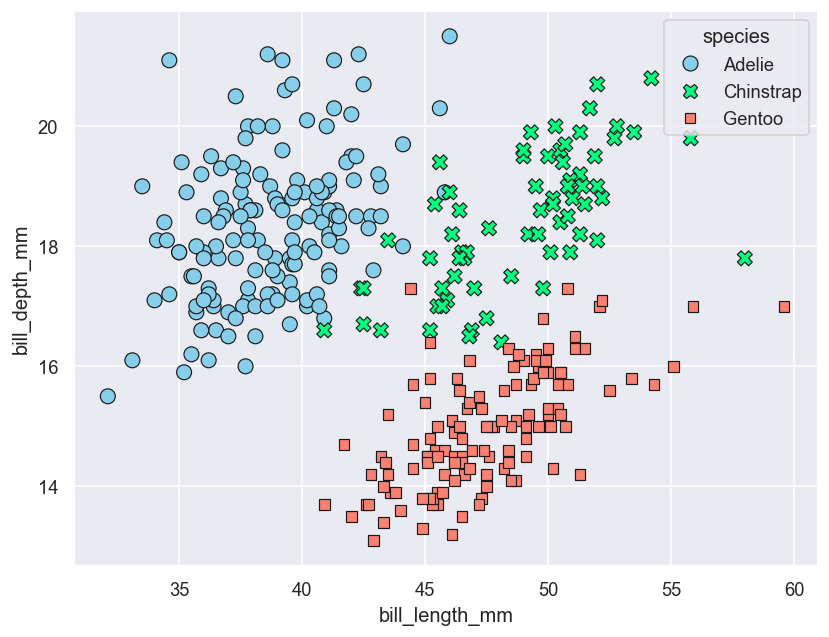

In [103]:
sns.scatterplot(
    x='bill_length_mm', y='bill_depth_mm', data=penguins,
    s=80,               # размер точек
    hue='species',
    palette=['skyblue', 'springgreen', 'salmon'],
    style='species',    # сделаем также разный "тип точек" для разных видов
    edgecolor='k'       # обводка точек - черная
)

plt.show()

---

### *2.5 Линейный график*

Линейные графики обычно используются для отображения **изменений во времени** или для построения **линии регрессии**

**Синтаксис**  
```python
sns.lineplot(x="time", y="value", data=table_name, ...)
```

[Документация](https://seaborn.pydata.org/generated/seaborn.lineplot.html) - посмотреть все аргументы и возможные значения

| Аргумент    | Что делает                                                                  |
| ----------- | --------------------------------------------------------------------------- |
| `data`      | Данные для построения lineplot (`pd.DataFrame`). **Обязательный** параметр. |
| `x`         | Название столбца для оси X (числовой или категориальный) |
| `y`         | Название столбца для оси Y (числовой признак) |
| `linestyle`     | Стиль линии (сплошная, пунктир, ...) |
| `style`     | Столбец, по которому рисовать разный тип линий |
| `estimator` | Функция агрегации точек на каждом X (`mean`, `median`, None и др.) |
| `ci` | Показывать ли доверительный интервал (`True` по умолчанию)  |

Мы все же будем рисовать график зависимости от **времени**. Для этого скачаем датасет с данными магнитно-резонансной томографии (fmri). 
- `subject` - id исследуемого
- `timepoint` - временная точка
- `event` - stim или cue
- `region` - сигнал был измерен в теменной (parietal) или фронтальной (frontal) коре
- `signal` - значение сигнала

In [109]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Нарисуем динамику сигнала с МРТ (`signal`) от времени (`timepoint`). 
- По OX - `timepoint`. 
- По OY - `signal`
- Для одной точки времени может быть несколько сигналов. То есть одному X соответствует несколько Y. Чтобы нарисовать линейный график, нам нужно **саггрегировать** значения Y для одного X. По умолчанию `seaborn` берет **среднее** значение (но можно изменить в параметре `estimator` на что-то другое)

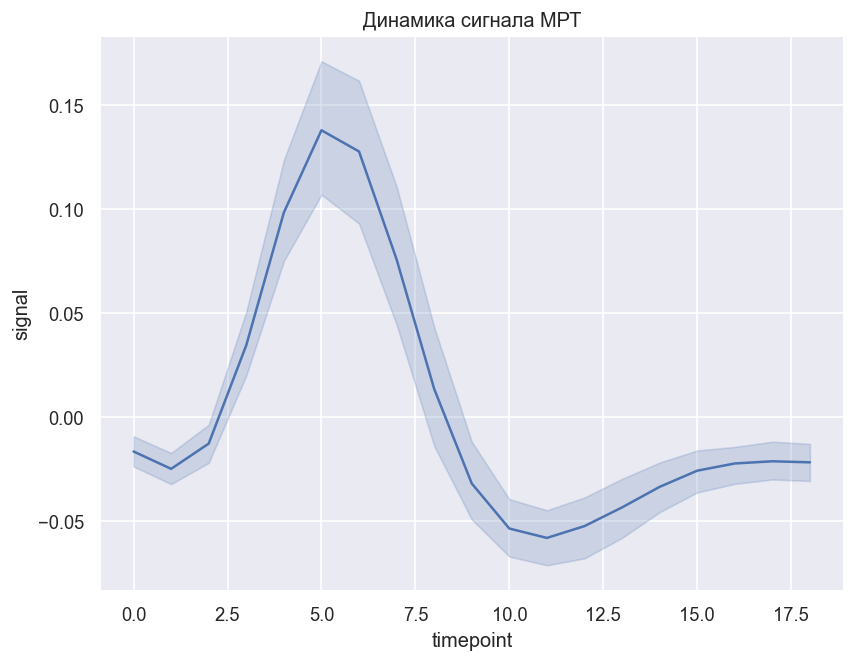

In [112]:
# основная линия - среднее значение sigmal для этого timepoint
# более светлая область - доверительный интервал
sns.lineplot(
    x='timepoint', y='signal', data=fmri
)

plt.title('Динамика сигнала МРТ');

Можно сделать свой тип "линии" по категориям через параметр `style`. Сделаем это по категориям `region` (в какой части регистрировали сигнал):

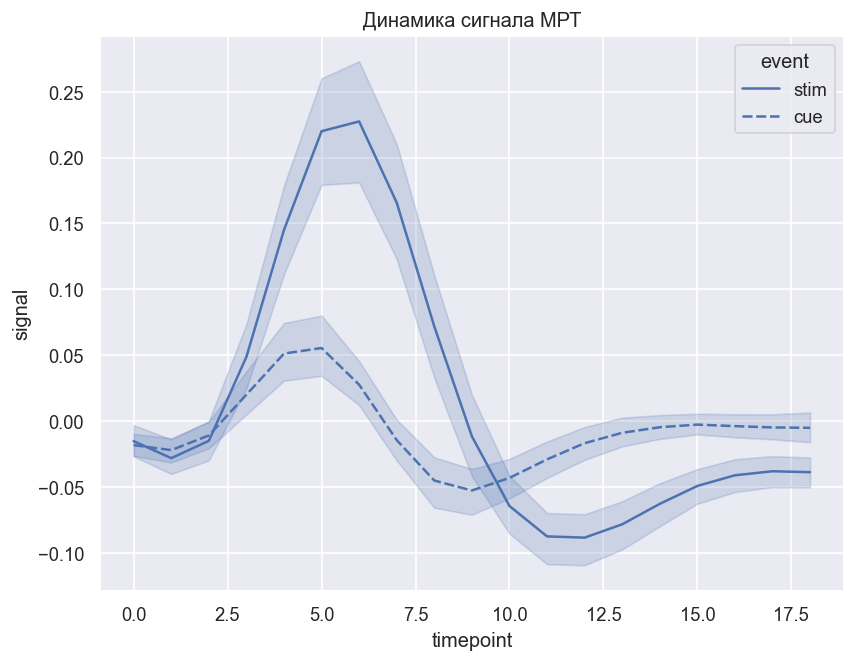

In [113]:
sns.lineplot(
    x='timepoint', y='signal', data=fmri,
    style='event'
)

plt.title('Динамика сигнала МРТ');

И все также можно применять `hue` (раскрасить каждый график в свой цвет):

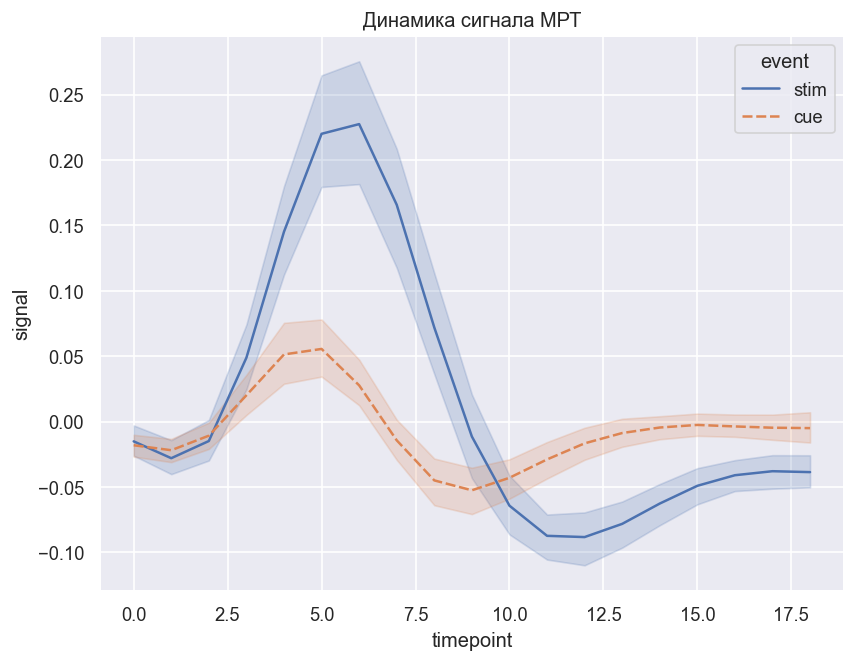

In [114]:
sns.lineplot(
    x='timepoint', y='signal', data=fmri,
    style='event', hue='event'
)

plt.title('Динамика сигнала МРТ');

---

## **3. Дополнительные графики**

### *3.1 Скрипичная диаграмма*

Violinplot сочетает ящик с усами и KDE (сглаженная гистограмма) для визуализации распределения *числовых* признаков.

**Синтаксис**
```python
sns.violinplot(x="category", y="value", data=table_name, ...)
```

[Документация](https://seaborn.pydata.org/generated/seaborn.violinplot.html) - посмотреть все аргументы и возможные значения

| Аргумент    | Что делает | 
| ---- | ---- | 
| `data`      | Данные для построения графика (`pd.DataFrame`). **Обязательный** параметр |
| `x`         | Категориальный признак по оси X |
| `y`         | Числовой признак для оси Y |
| `orient`    | Ориентация графика: `'v'` — вертикально, `'h'` — горизонтально |
| `width`     | Ширина графика |
| `inner`     | Что показывать внутри скрипки: `'box'`, `'quartile'`, `'point'`, `'stick'` |
| `gridsize`  | Количество точек для отображения распределения  |


Нарисуем, как и в ящике-с-усами, распределение длины клюва:

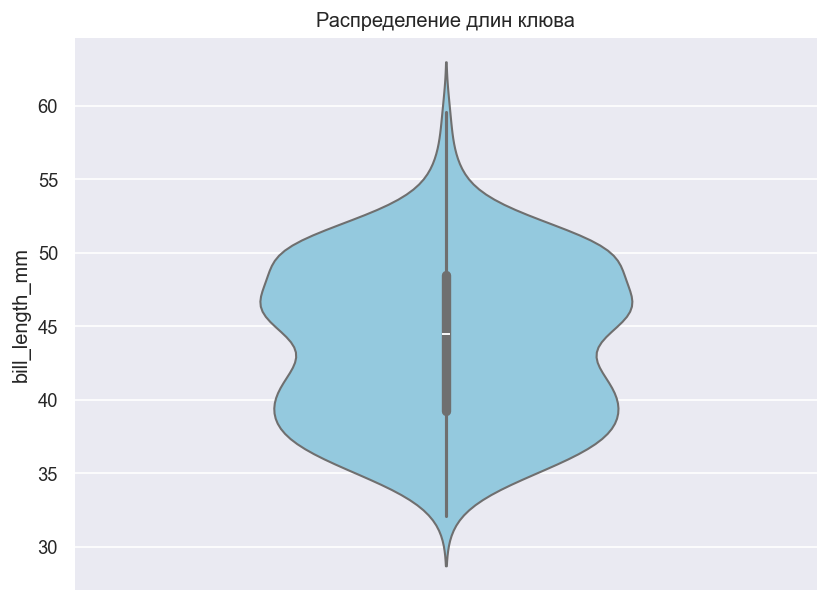

In [115]:
# в центре видим боксплот с выделенной медианой
# по бокам - распределение признака (сглаженная гистограмма)

sns.violinplot(
    y = 'bill_length_mm', data = penguins,
    width=0.5,   # ширина графика
    color='skyblue'
)
plt.title('Распределение длин клюва');

Можем также разделить по признаку пола `sex`:

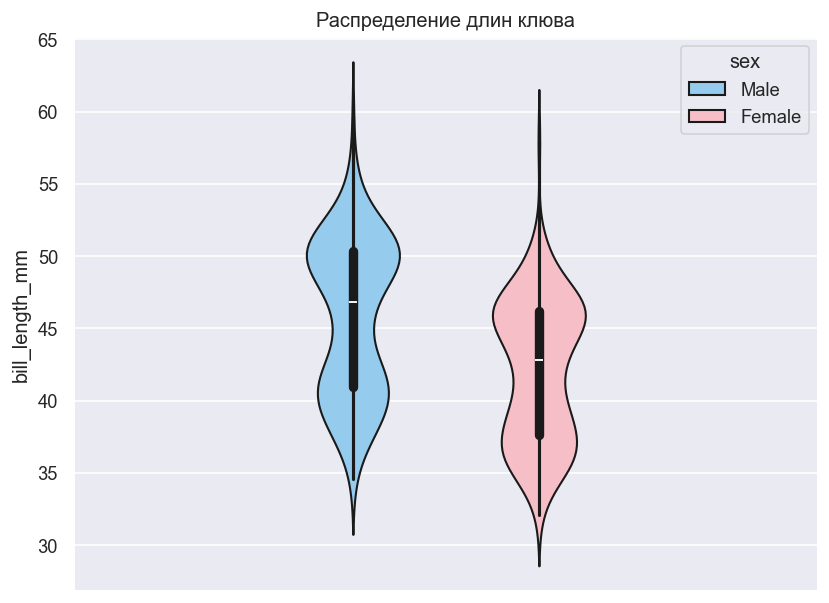

In [116]:
sns.violinplot(
    y = 'bill_length_mm', data = penguins, 
    width=0.5,      # ширина каждого violin plot
    linecolor='k',  # цвет обводки
    hue='sex',      # для каждого пола свой violin
    gap=0.5,        # расстояние между разными violin-plots
    palette=['lightskyblue', 'lightpink']
)

plt.title('Распределение длин клюва');

---

### *3.2 Тепловая карта (heatmap)*

**Heatmap** визуализирует значения матрицы. Удобен для визуализации **корреляций** признаков.

**Синтаксис**
```python
    sns.heatmap(data=matrix, ...)
```

[Документация](https://seaborn.pydata.org/generated/seaborn.heatmap.html) - посмотреть все аргументы и возможные значения


| Аргумент     | Что делает | 
| ---- | ---- | 
| `data`       | `pd.DataFrame` или матрица с **числовыми** значениями |
| `annot`      | Показывать ли значения ячеек (`True/False`) |
| `fmt`        | Формат аннотаций (округление; например, `".2f"`)  |
| `linewidths` | Толщина линий между ячейками |
| `linecolor`  | Цвет линий между ячейками |
| `cbar`       | Показывать ли цветовую шкалу (`True/False`) |
| `cmap`       | Цветовая шкала (названия - по [ссылке](https://seaborn.pydata.org/tutorial/color_palettes.html)) |
| `vmin` | Минимальное значение, от которого будет "отсчитываться" цвет | 
| `vmax` | Максимальное значение, до которого будет "отсчитываться" цвет | 

Посмотрим на матрицу корреляции в нашем датасете:

In [117]:
penguins_cormat = penguins.corr(numeric_only=True)
penguins_cormat

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Все эти значения мы можем отобразить в `heatmap`. Они будут отображаться цветовой шкалой - меньшие занчени одним цветом; большие значения - другим.
- При *дефолтных* параметров *низкие значения* корреляции (минимальное ее значение = -1) отображаются *темно-фиолетовым*. Но на графике будет все прибиваться не к минимальному значению -1, а к минимальной корреляции из вашей матрицы (у нас это около -0.5)
- *Высокие значения корреляции* (в матрице всегда будут = 1, потому что это автокорреляция) - показываются светлым.

Тогда, глядя на матрицу, мы можем быстро выявить сильно-коррелирующие и слабо коррелирующие признаки. Без необходимости рассматривать числа в матрице :)

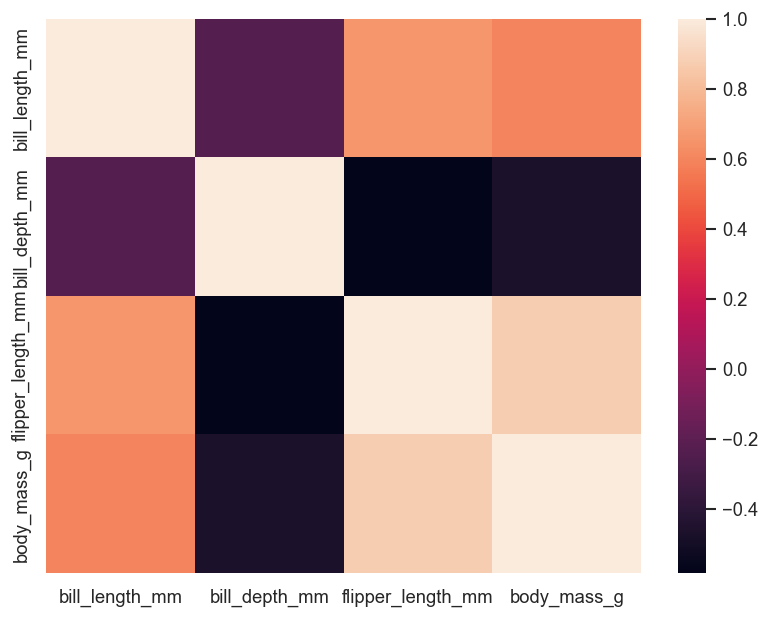

In [118]:
sns.heatmap(data=penguins_cormat);

Но немного адаптируем график.

Пока что плохо, что по обе стороны от 0 - отрицательная и положительная корреляции - имеют разные значения. Хочется, чтобы мы явно понимали, это высокое или низкое значение корреляции. Вне зависимости от нашего датасета
1. настраиваем `vmin=-1` и `vmax=1`
2. делаем другую палетку: супер подходит `cmap=coolwarm`, у которого белый цвет в середине, синий внизу (к -1) и красный вверху (к 1)
    - тогда *слабые* корреляции будут *светлыми*
    - *сильные положительные* корреляции - красными
    - *сильные отрицательные* корреляции - синими

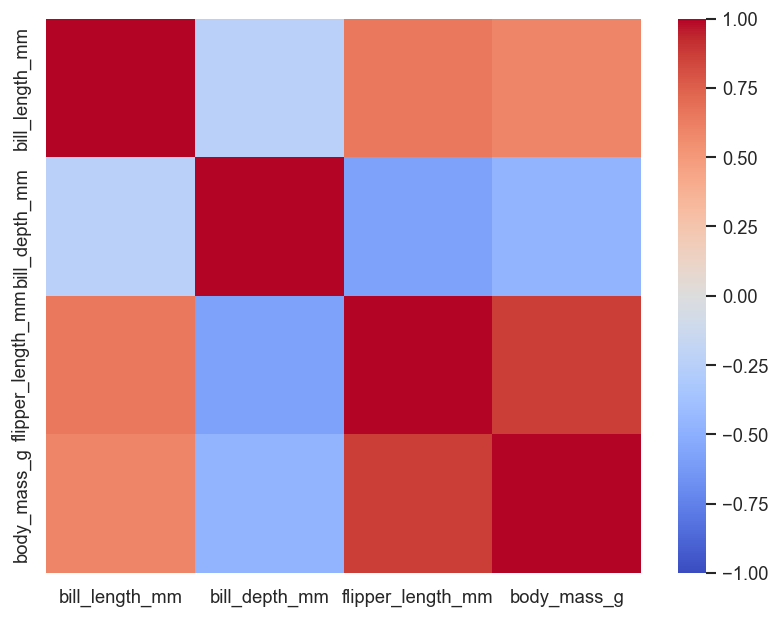

In [121]:
penguins_cormat = penguins.corr(numeric_only=True)

sns.heatmap(
    data=penguins_cormat,
    vmin=-1,    # ограничиваем colorbar снизу значением -1
    vmax=1,     # ограничиваем colorbar сверху значением 1
    cmap='coolwarm'
);

Добавим сами значения корреляции на график:
- `annot=True`
- Округлим их до второго знака после запятой: `fmt='.2f'`

<Axes: >

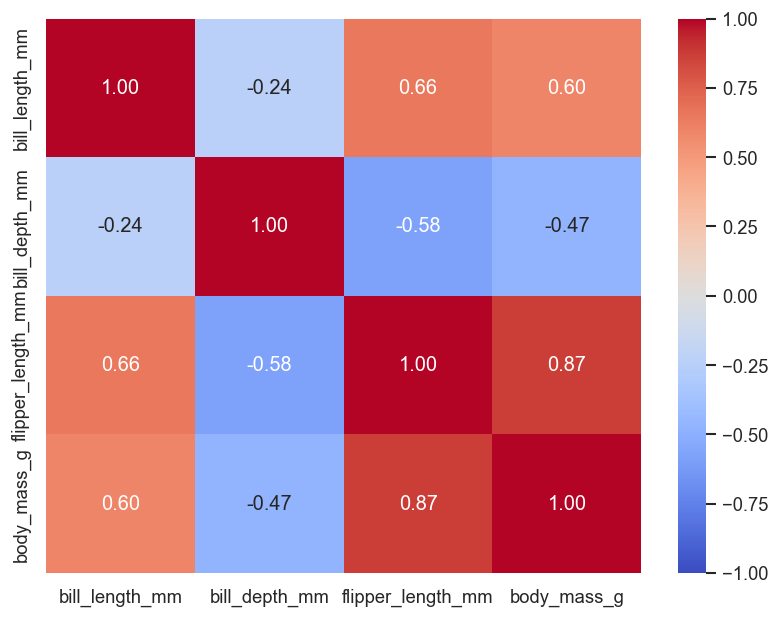

In [122]:
penguins_cormat = penguins.corr(numeric_only=True)

sns.heatmap(
    data=penguins_cormat, 
    annot=True,     # добавляем значения корреляции на гарфик
    fmt='.2f',      # округляем до 2го знака после запятой
    linecolor='black',
    vmin=-1, vmax=1,
    cmap='coolwarm'
)

---

### *3.3 График Всего (`pairplot`)*

**Pairplot** строит матрицу *попарных диаграмм рассеяния* и *распределений* для нескольких **числовых** признаков. Помогает быстро оценить связи между всеми признаками.

**Синтаксис:**
```python
    sns.pairplot(data=table_name, ...)
```

[Документация](https://seaborn.pydata.org/generated/seaborn.countplot.html) - посмотреть все аргументы и возможные значения

| Аргумент    | Что делает | 
| ----- | ---- | 
| `data`      | DataFrame с данными для построения матрицы графиков **обязательный** |
| `vars`      | Список колонок для парных графиков (по умолчанию все числовые) |
| `x_vars`    | Колонки для оси X (если нужна часть признаков) |
| `y_vars`    | Колонки для оси Y |
| `kind`      | Тип вне-диагональных графиков: `'scatter'`, `'reg'`, `'kde'`, `'hist'` |
| `diag_kind` | Тип диагональных графиков: `'auto'`, `'hist'`, `'kde'` |
| `height`    | Размер одной ячейки графика |
| `aspect`    | Соотношение сторон ячейки графика  |
| `dropna`    | Исключать ли строки с пропусками (`True/False`) |
| `plot_kws`  | Словарь параметров для вне-диагональных графиков |
| `diag_kws`  | Словарь параметров для диагональных графиков |
 

Попробуем посмотреть на взаимосвязь всех числовых признаков в датасете с пингвинами. Обратите внимание, что вне-диагональные графики одинаковые! Просто инвертированные

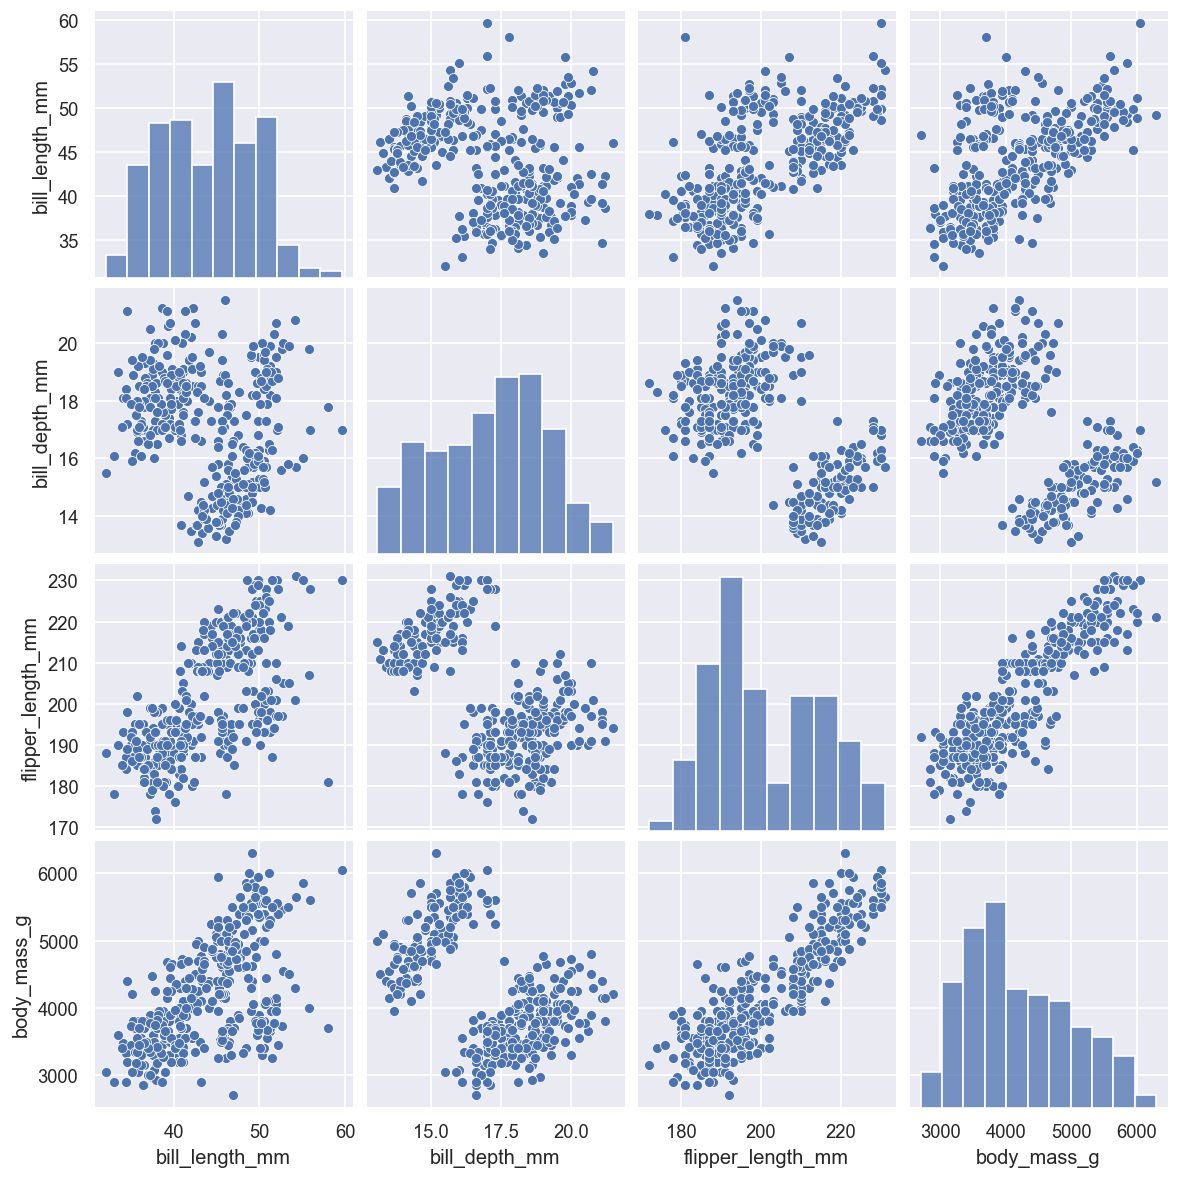

In [123]:
sns.pairplot(penguins);

Можем также нарисовать те же графики по категориям (`hue`):

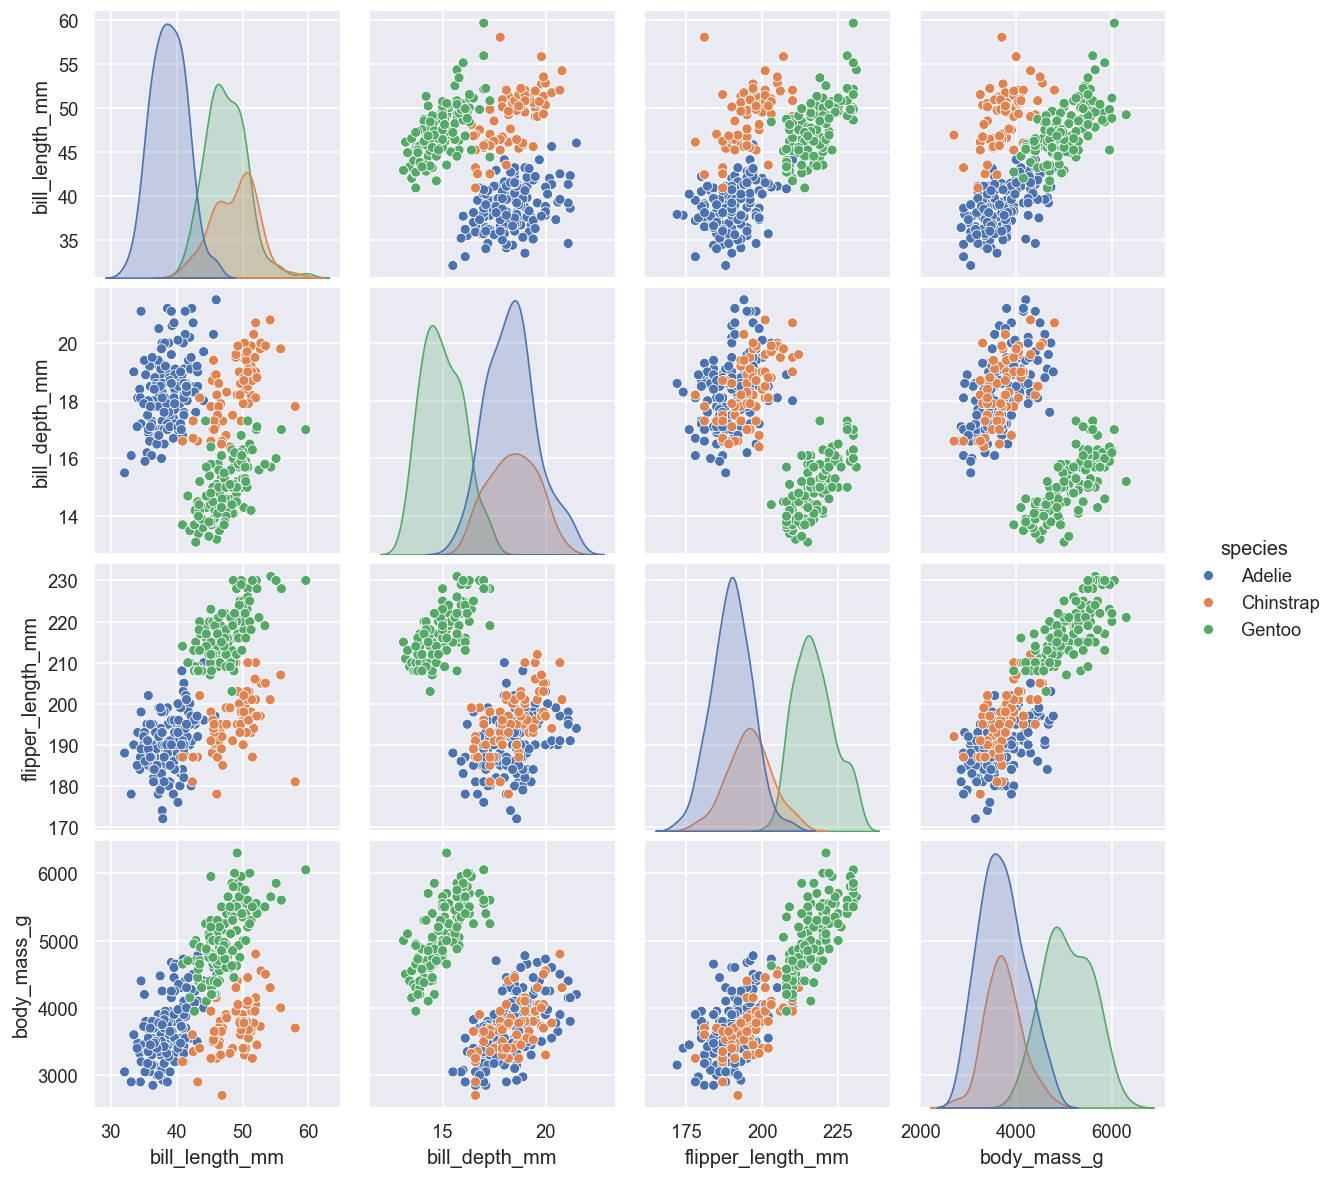

In [124]:
sns.pairplot(penguins, hue='species')
plt.show()

Внедиагольнальные графики дублируют друг друга. Можем убрать один угол, чтобы не мылил глаз:

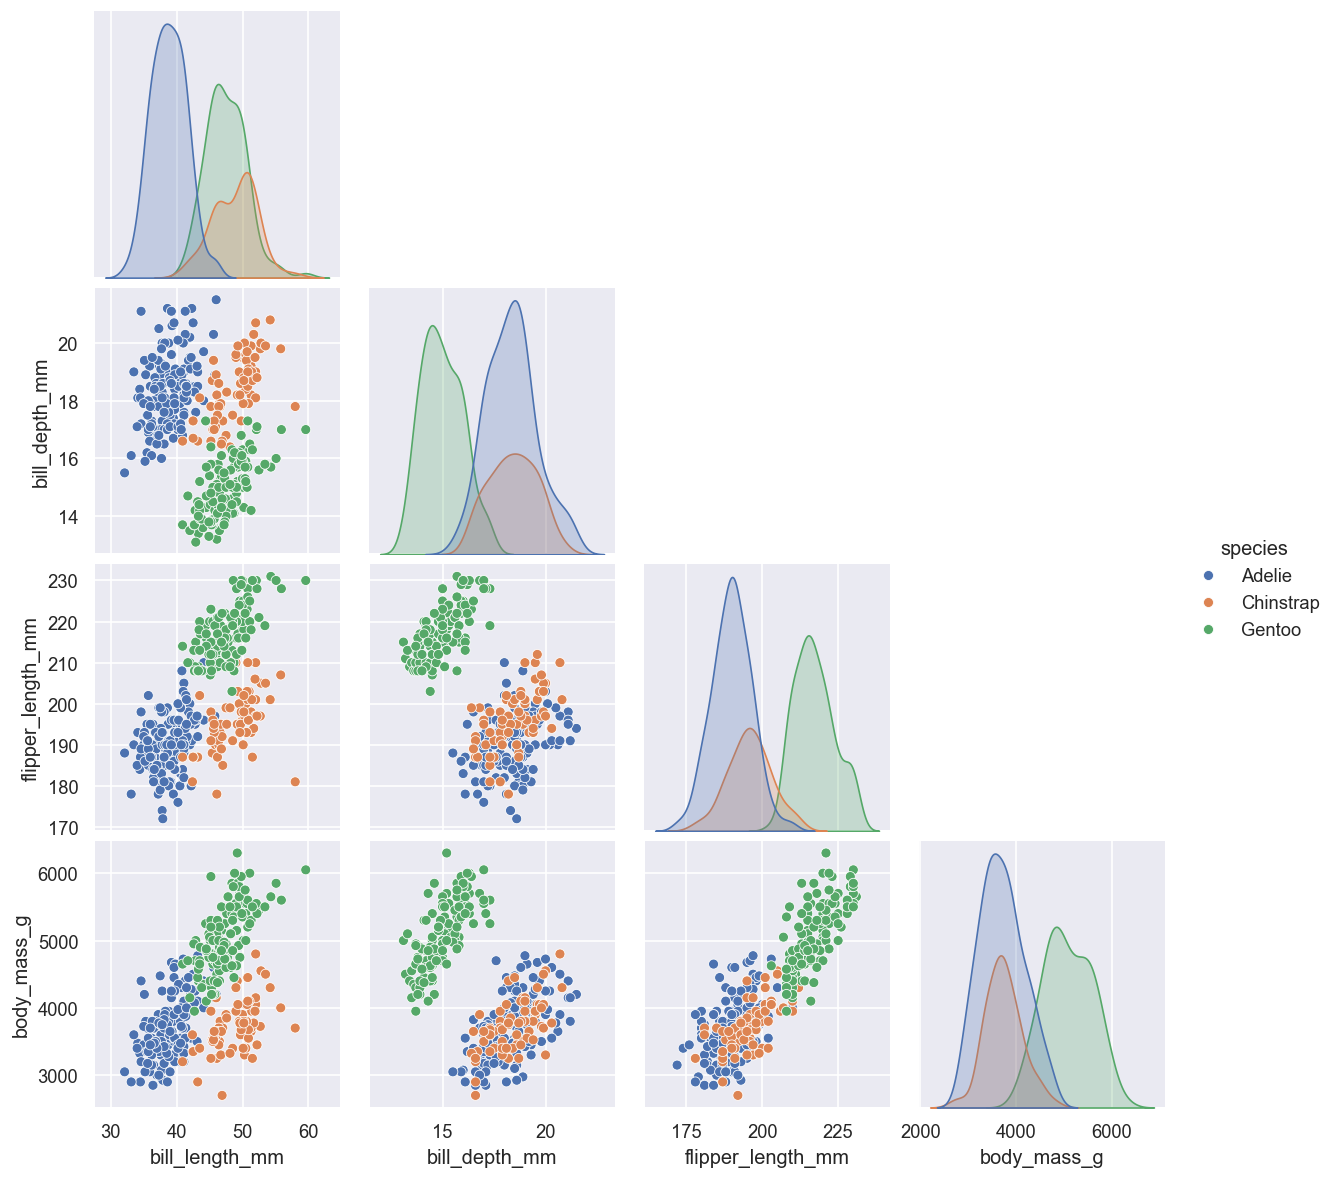

In [125]:
sns.pairplot(
    penguins,
    hue='species',
    corner=True     # рисуем только один "угол"
)
plt.show()

---

### *3.4 График рассеяния + линейная регрессия (`lmplot`)*

`lmplot` используется для визуализации одновременно графика рассеяния (по умолчанию, можно и другой) и линии линейной регрессии

**Синтаксис:**
```python
    sns.lmplot(
        x="x_variable", y="y_variable", data=table_name, ...
    )
```

[Документация](https://seaborn.pydata.org/generated/seaborn.lmplot.html) - посмотреть все аргументы и возможные значения



Построим зависимость длины крыла от веса пингвина:
- будет обычный график рассеяния
- и сверху линейная регрессия

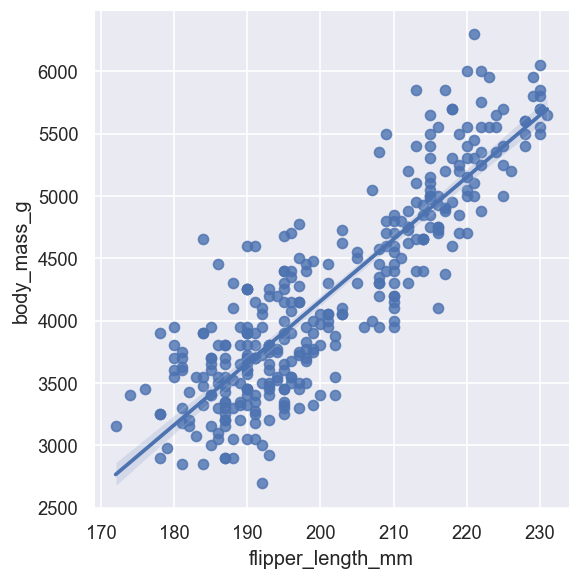

In [126]:
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=penguins)
plt.show()

Можно нарисовать такой график по категориям:

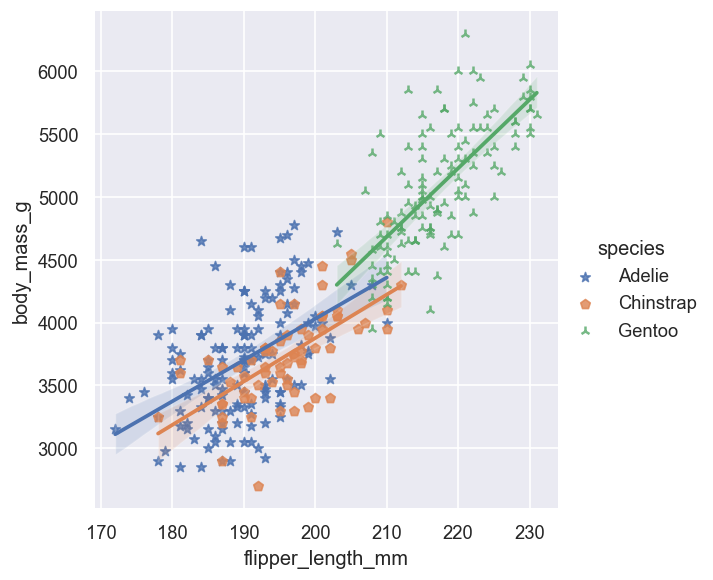

In [ ]:
sns.lmplot(
    x='flipper_length_mm', y='body_mass_g', data=penguins, 
    hue='species',      # столбец с категориями, по которым хотим поделить график
    markers=['*', 'p', '2']     #  маркеры для категорий - https://matplotlib.org/stable/api/markers_api.html
);

---

### *3.5 График рассеяния + гистограмма (`jointplot`)*

`jointplot` используется для визуализации взаимосвязи между двумя переменными (scatter) с отображением их индивидуальных распределений (histplot). То есть он позволяет посмотреть как на **основную зависимость**, так и на отдельных **распределения переменных**. По своей задаче похож на `violinplot`, только здесь два типа графиков более разнесены

**Синтаксис:**
```python
    sns.jointplot(
        x="x_variable", y="y_variable",  data=table_name, ...
    )
```

[Документация](https://seaborn.pydata.org/generated/seaborn.countplot.html) - посмотреть все аргументы и возможные значения

| Аргумент         | Что делает                                                                   |
| ---------------- | ---------------------------------------------------------------------------- |
| `data`           | DataFrame с данными для построения графика **обязательный**                  |
| `x`              | Числовой признак для оси X                                                   |
| `y`              | Числовой признак для оси Y                                                   |
| `kind`           | Тип графика: `'scatter'`, `'kde'`, `'hist'`, `'hex'`, `'reg'`                |
| `height`         | Размер графика                                                      |
| `space`          | Расстояние между основной областью и маргинальными графиками                 |
| `joint_kws`      | Параметры для основной диаграммы                                             |
| `marginal_kws`   | Параметры для маргинальных гистограмм или KDE                                |


Построим ту же зависимость размера крыла от массы тела:
- видим тот же график рассения
- и гистограммы этих признаков

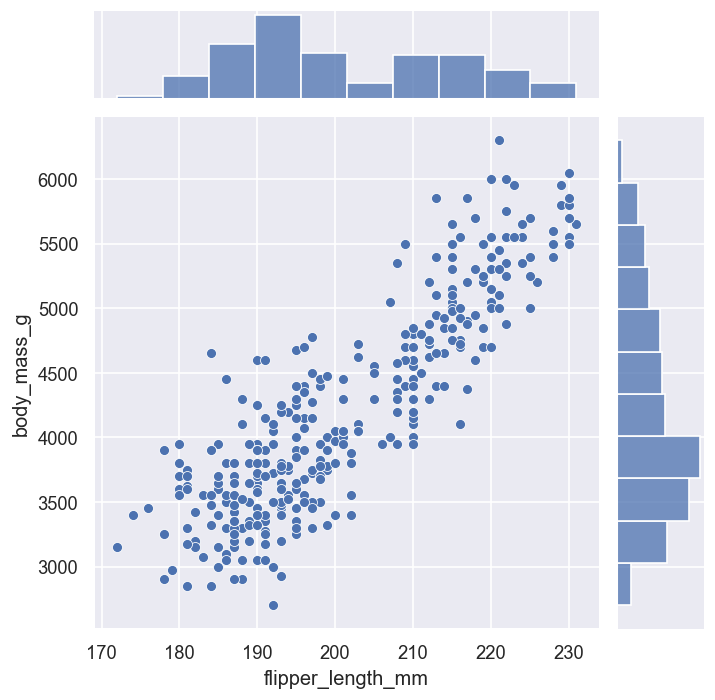

In [60]:
sns.jointplot(x='flipper_length_mm', y='body_mass_g', data=penguins)
plt.show()

Можем точно также добавить `hue`:

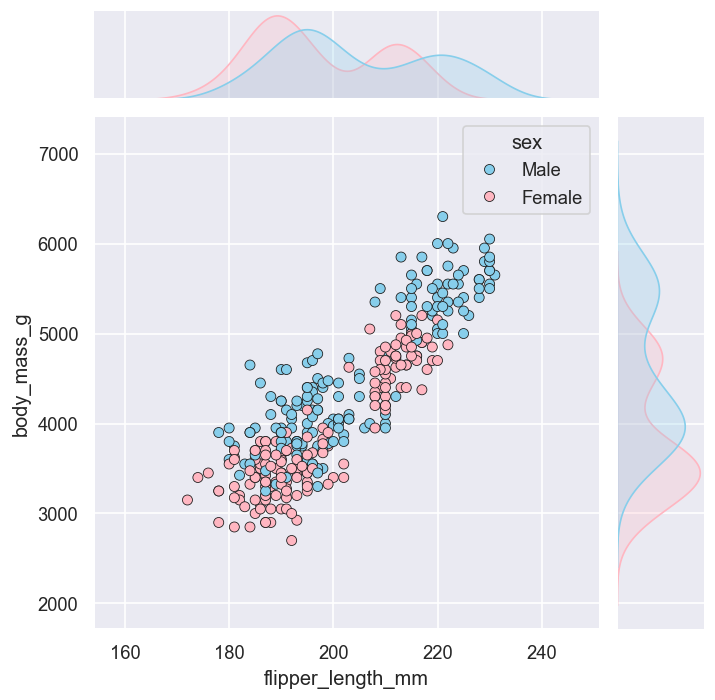

In [129]:
sns.jointplot(
    x='flipper_length_mm', y='body_mass_g', data=penguins,
    hue='sex',          # добавляем дележку по полу
    palette=['skyblue', 'lightpink'],
    edgecolor='k'       # выделяем кружки на скеттере
)
plt.show()

А можно прикрутить и линейную регрессию:

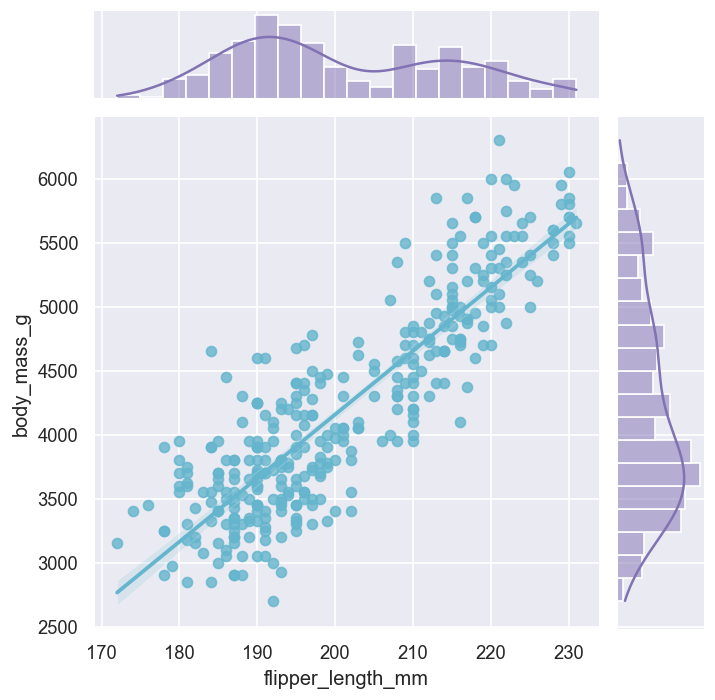

In [132]:
sns.jointplot(
    x='flipper_length_mm', y='body_mass_g',
    data=penguins,
    kind='reg',     # на скеттерплоте рисуем линию регрессии
    marginal_kws={'bins': 20, 'color': 'm'},    # параметры гистограмм
    joint_kws={'color': 'c'},                   # параметры скеттера
)
plt.show()